In [1]:
# Load all dictionaries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon



### Move to the directory where you have the data

In [2]:
## in the local
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')
shuffle_conditions = np.load('Shuffle_conditions.npy')
shuffle_conditions_d = np.load('Shuffle_conditions_d.npy')

os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons')

In [ ]:
## if I am in the cluster
os.chdir('/home/david/Desktop/IDIBAPS/Gottlib')

## Target Decoding
### Load data



In [3]:

cd_LIP_hm = np.load('cd_LIP_hm.npy')
cd_DLPFC_hm = np.load('cd_DLPFC_hm.npy')
cd_LIP = np.load('cd_LIP.npy')
cd_DLPFC = np.load('cd_DLPFC.npy')



#### Error of each neuron for each cross-decoding condition

In [4]:
print(np.shape(cd_LIP))
print('conditions, train, test, neuron_error')

(4, 22, 22, 44)
conditions, train, test, neuron_error


#### Each "square" has 44 or 63 values (1 per neuron). For the heatmap, I get the mean of all the neurons in each cross-decoding condition

In [5]:
print(np.shape(cd_LIP_hm))
print('conditions, train, test value (mean error of all the neurons)')

(4, 22, 22)
conditions, train, test value (mean error of all the neurons)


### Heatmaps

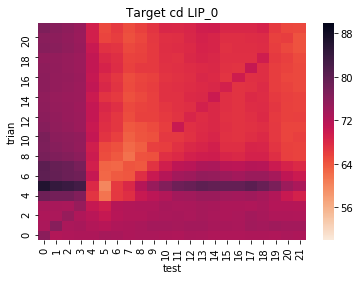

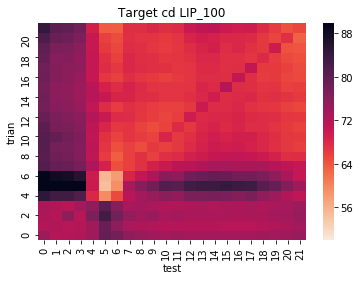

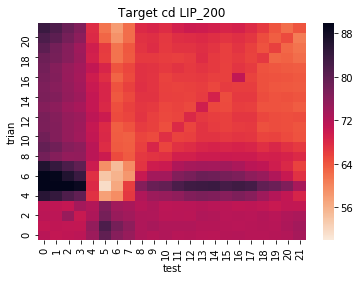

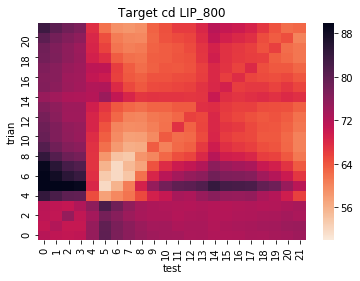

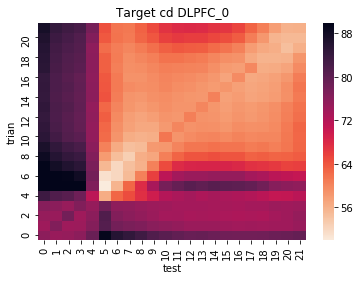

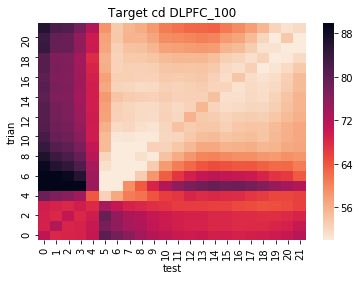

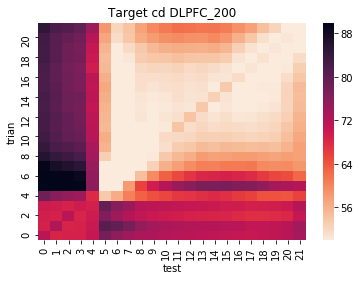

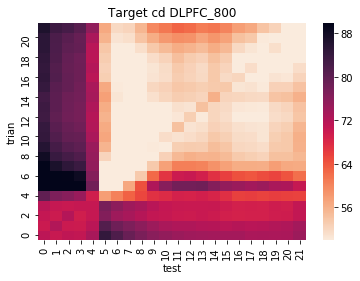

In [6]:

Conditions_titles_lip = ['LIP_0', 'LIP_100', 'LIP_200', 'LIP_800']
Conditions_titles_dlpfc = ['DLPFC_0', 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']

#sns.cm.rocket_r
for Cond in range(0,4):
    ax = sns.heatmap(cd_LIP_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Target cd ' + Conditions_titles_lip[Cond])
    plt.show()

for Cond in range(0,4):
    ax = sns.heatmap(cd_DLPFC_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Target cd ' + Conditions_titles_dlpfc[Cond])
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


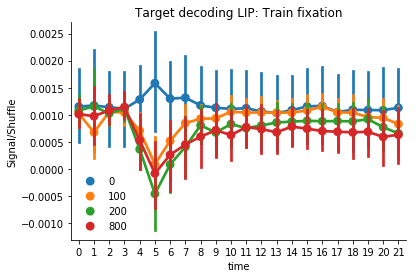

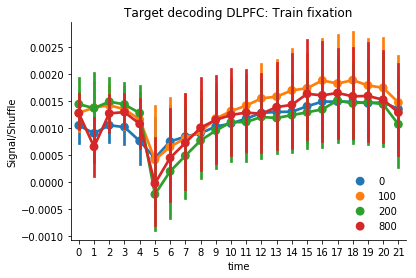

In [7]:
#### All times (training in fixation presentation, test on the rest)
frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(1/cd_LIP[idx, 1, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP[idx,1, : ][i] - 1/shuffle_conditions[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()

    
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train fixation' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(1/cd_DLPFC[idx, 1, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC[idx,1, : ][i] - 1/shuffle_conditions[idx+4].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train fixation' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


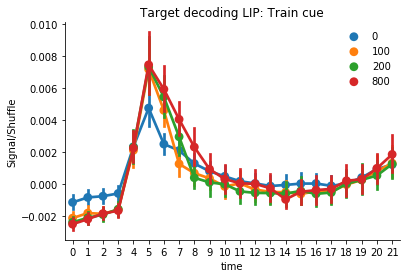

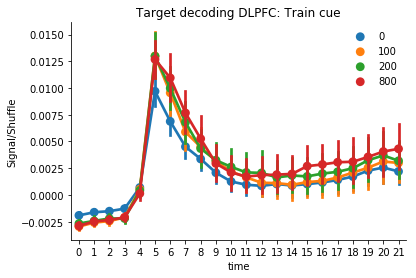

In [7]:
#### All times (training in distractor presentation, test on the rest)
frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_LIP[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP[idx, 5, : ][i] - 1/shuffle_conditions[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train cue' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):    
    #n=pd.DataFrame(1/cd_DLPFC[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC[idx, 5, : ][i] - 1/shuffle_conditions[idx+4].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train cue' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


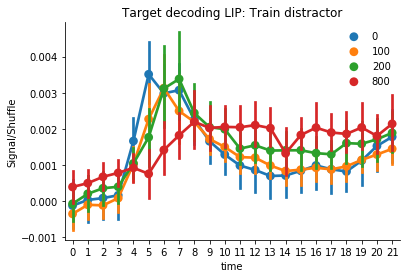

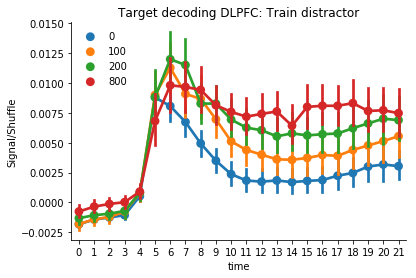

In [8]:
#### All times (training in distractor presentation, test on the rest)

distractor_times=[6,7,8,14]


frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_LIP[idx, distractor_times[idx], : ]).transpose()
    n = pd.DataFrame([1/np.array(cd_LIP[idx, distractor_times[idx], : ][i]) - 1/np.array(shuffle_conditions[idx].mean(axis=0)[i]) for i in range(0, 22)]).transpose()

    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_DLPFC[idx, distractor_times[idx], : ]).transpose()
    n = pd.DataFrame(np.array([1/ np.array(cd_DLPFC[idx, distractor_times[idx], : ][i]) - 1/ np.array(shuffle_conditions[4+idx].mean(axis=0)[i]) for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='DLPFC'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

In [12]:
np.shape(cd_DLPFC[idx, distractor_times[idx], : ])

(22, 63)

In [59]:
#n = pd.DataFrame([1/np.array(cd_LIP[idx, distractor_times[idx], : ][i]) - 1/np.array(shuffle_conditions[idx].mean(axis=0)[i]) for i in range(0, 22)]).transpose()
i=0
#1/np.array(cd_LIP[idx, distractor_times[idx], : ][i]) -  
#shuffle_conditions[idx].mean(axis=0)
np.shape(shuffle_conditions)

(285, 176)

In [29]:
#### Subtract shuffle neuron by neuron!!!

os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')
shuffle_conditions = np.load('Shuffle_each_conditions.npy', encoding = 'latin1')
np.shape(shuffle_conditions[0])

sh_cond=1
time=100 ## 22*8
neuron =23 
np.shape(shuffle_conditions[sh_cond, time][neuron])
np.shape(shuffle_conditions[sh_cond, time])

## Amount of neuorn in first 4 and 2nd 4 conditions (IPS, DLPFC)
amount_neurons = np.unique([np.shape(shuffle_conditions[sh_cond, time])[0] for time in range(0, 176)])

shuffle_conditions = shuffle_conditions[0]


#### For each condition I have the (285, 22) matrix of each neuron
ns_IPS_0={}
ns_IPS_100={}
ns_IPS_200={}
ns_IPS_800={}
ns_DLPFC_0={}
ns_DLPFC_100={}
ns_DLPFC_200={}
ns_DLPFC_800={}

conditions_dictionaries= [ns_IPS_0, ns_IPS_100,ns_IPS_200, ns_IPS_800, ns_DLPFC_0, ns_DLPFC_100, ns_DLPFC_200, ns_DLPFC_800]
neurons_cons = [44, 44, 44, 44, 63, 63, 63, 63]
start_conditions = list(np.arange(0, 176, 22))
end_conditions = list(np.array(start_conditions) + 22 )

for Condition in range(0,8):
    start=start_conditions[Condition]
    end = end_conditions[Condition]
    n_neurons= neurons_cons[Condition]
    for neuron in range(0, n_neurons):
        times=[]
        for t in range(start,end):
            times.append(pd.DataFrame([shuffle_conditions[i, t][neuron] for i in range(0, 285)]))

        n_t = pd.concat(times, axis=1)
        n_t.columns = [str(i) for i in range(0,22)]
        conditions_dictionaries[Condition][str(neuron)] = n_t


        
        
conditions_dictionaries[6].keys()


dict_keys(['8', '54', '33', '15', '7', '14', '30', '6', '11', '29', '13', '50', '46', '18', '3', '27', '58', '35', '1', '36', '23', '41', '52', '2', '19', '17', '51', '59', '26', '53', '21', '32', '4', '37', '20', '31', '48', '5', '43', '61', '39', '10', '47', '22', '25', '24', '57', '62', '9', '49', '42', '16', '28', '56', '34', '60', '45', '0', '55', '44', '40', '12', '38'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


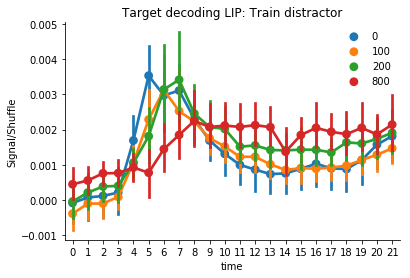

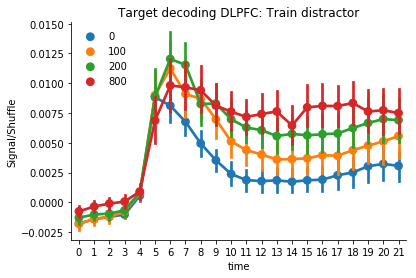

In [30]:
distractor_times=[6,7,8,14]

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = (1/np.array(n.iloc[neuron])) - (1/np.array(sh_cond_n))
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = (1/np.array(n.iloc[neuron])) - (1/np.array(sh_cond_n))
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


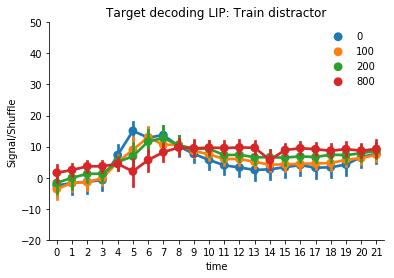

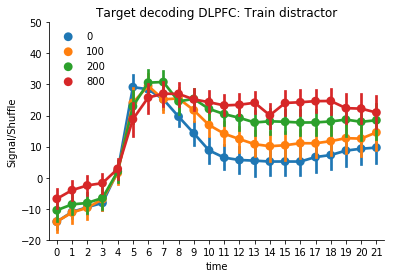

In [37]:
distractor_times=[6,7,8,14]

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron])- np.array(sh_cond_n)
        subst = -1 * subst
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(-20, 50)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.ylim(-20, 50)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


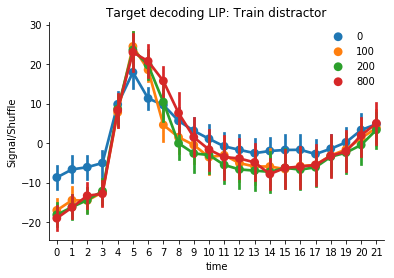

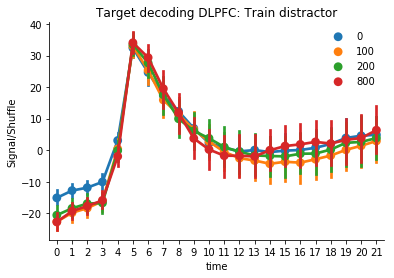

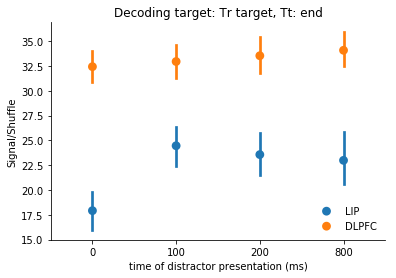

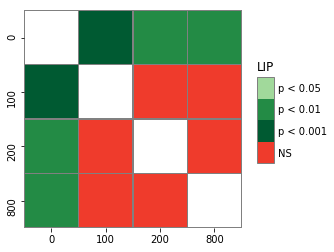

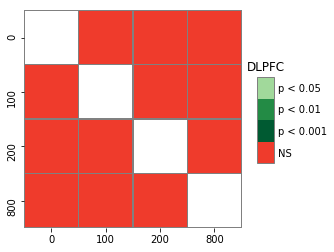

In [128]:
frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP[idx, 5, : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC[idx, 5, : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


cond=[0, 100, 200, 800]
frames=[]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] ==5) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] ==5) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Decoding target: Tr target, Tt: end')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


####### Multiple comparisons
pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


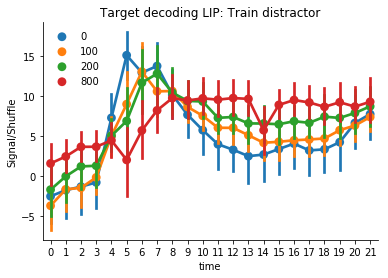

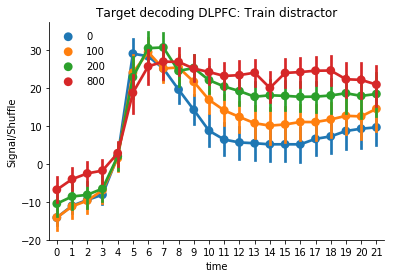

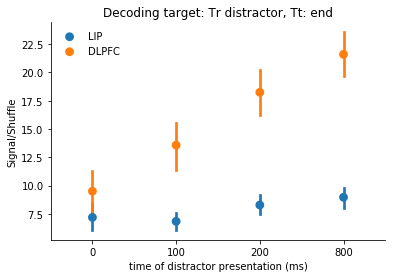

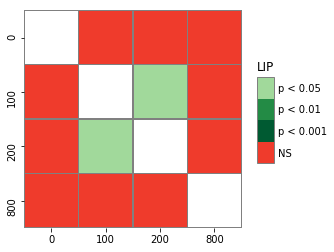

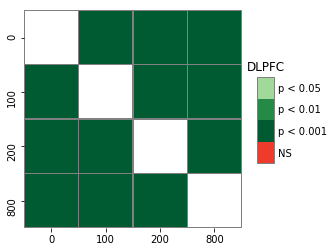

In [127]:
distractor_times=[6,7,8,14]

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


cond=[0, 100, 200, 800]
frames=[]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] >19) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] >19) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Decoding target: Tr distractor, Tt: end')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


####### Multiple comparisons
pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

## Decode distractor
### Load data

In [38]:
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons')

cd_LIP_d_hm = np.load('cd_LIP_d_hm.npy')
cd_DLPFC_d_hm = np.load('cd_DLPFC_d_hm.npy')
cd_LIP_d = np.load('cd_LIP_d.npy')
cd_DLPFC_d = np.load('cd_DLPFC_d.npy')

### Heatmaps

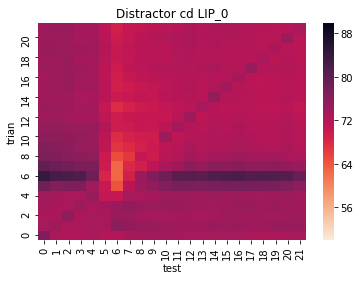

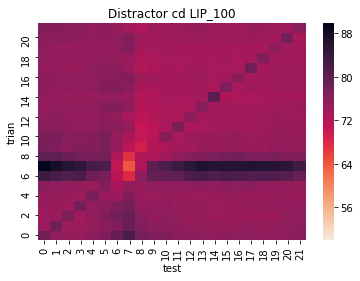

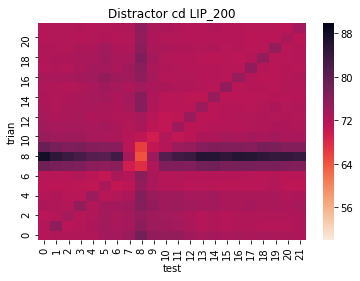

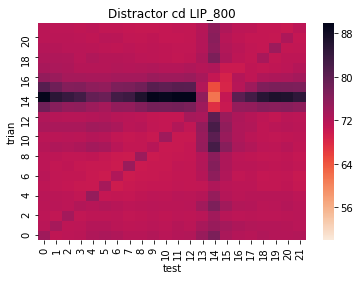

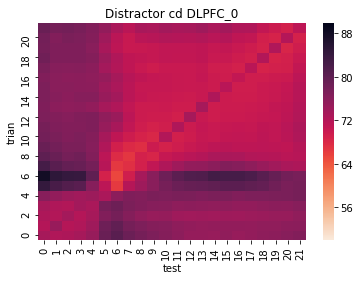

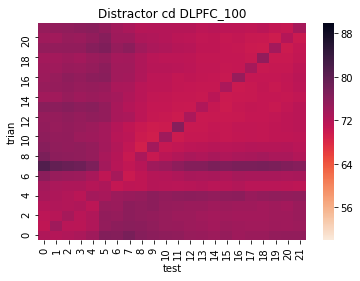

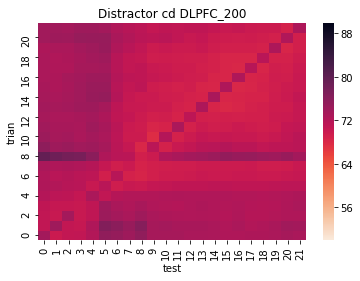

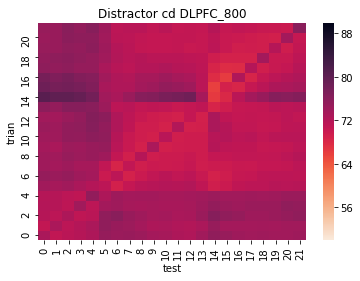

In [39]:
Conditions_titles_lip = ['LIP_0', 'LIP_100', 'LIP_200', 'LIP_800']
Conditions_titles_dlpfc = ['DLPFC_0', 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']

#sns.cm.rocket_r
for Cond in range(0,4):
    ax = sns.heatmap(cd_LIP_d_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Distractor cd ' + Conditions_titles_lip[Cond])
    plt.show()

for Cond in range(0,4):
    ax = sns.heatmap(cd_DLPFC_d_hm[Cond],vmin=50, vmax=90, cmap= sns.cm.rocket_r )
    ax.invert_yaxis()
    plt.xlabel('test')
    plt.ylabel('trian')
    plt.title('Distractor cd ' + Conditions_titles_dlpfc[Cond])
    plt.show()

#### Load the shuffle neuron by neuron

In [40]:
#### Subtract shuffle neuron by neuron!!!
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')
shuffle_conditions_d = np.load('Shuffle_each_conditions_d.npy', encoding = 'latin1')

### it is duplicated in each, so the first is fine!
shuffle_conditions_d = shuffle_conditions_d[0]
np.shape(shuffle_conditions_d[0])

sh_cond=1
time=100 ## 22*8
neuron =23 
np.shape(shuffle_conditions_d[sh_cond, time][neuron])
np.shape(shuffle_conditions_d[sh_cond, time])

## Amount of neuorn in first 4 and 2nd 4 conditions (IPS, DLPFC)
amount_neurons = np.unique([np.shape(shuffle_conditions_d[sh_cond, time])[0] for time in range(0, 176)])
print(amount_neurons)

#### For each condition I have the (285, 22) matrix of each neuron
ns_IPS_0={}
ns_IPS_100={}
ns_IPS_200={}
ns_IPS_800={}
ns_DLPFC_0={}
ns_DLPFC_100={}
ns_DLPFC_200={}
ns_DLPFC_800={}

conditions_dictionaries_d= [ns_IPS_0, ns_IPS_100,ns_IPS_200, ns_IPS_800, ns_DLPFC_0, ns_DLPFC_100, ns_DLPFC_200, ns_DLPFC_800]
neurons_cons = [44, 44, 44, 44, 63, 63, 63, 63]
start_conditions = list(np.arange(0, 176, 22))
end_conditions = list(np.array(start_conditions) + 22 )

for Condition in range(0,8):
    start=start_conditions[Condition]
    end = end_conditions[Condition]
    n_neurons= neurons_cons[Condition]
    for neuron in range(0, n_neurons):
        times=[]
        for t in range(start,end):
            times.append(pd.DataFrame([shuffle_conditions_d[i, t][neuron] for i in range(0, 285)]))

        n_t = pd.concat(times, axis=1)
        n_t.columns = [str(i) for i in range(0,22)]
        conditions_dictionaries_d[Condition][str(neuron)] = n_t


#


[44 63]


### Testing: distractor presentation

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


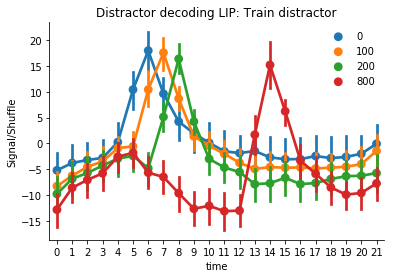

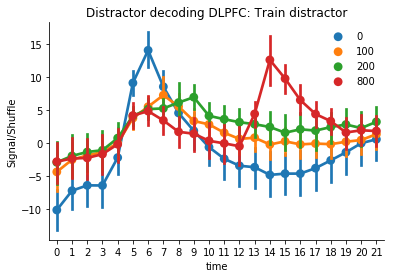

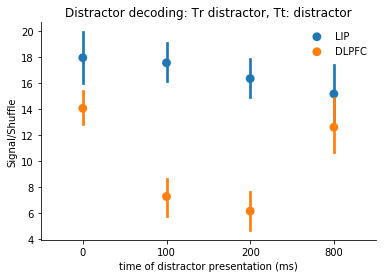

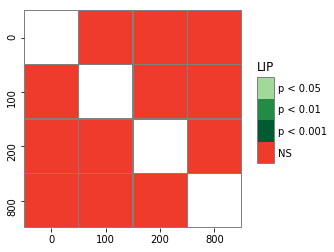

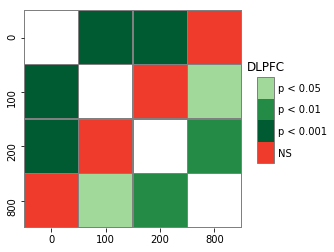

In [117]:
distractor_times=[6,7,8,14]

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP_d[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries_d[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding LIP: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC_d[idx, distractor_times[idx], : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries_d[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding DLPFC: Train distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


cond=[0, 100, 200, 800]
frames=[]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] == distractor_times[i]) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] == distractor_times[i]) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Distractor decoding: Tr distractor, Tt: distractor')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


####### Multiple comparisons
pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()


In [ ]:
### Testing: target presentation

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


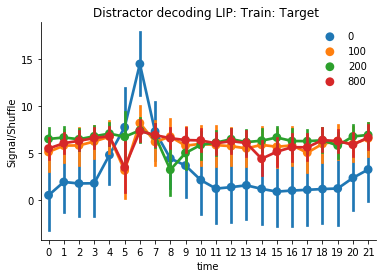

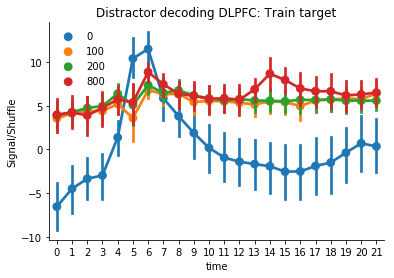

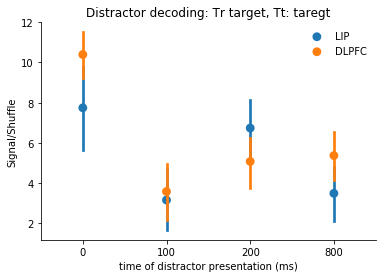

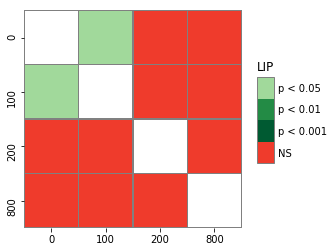

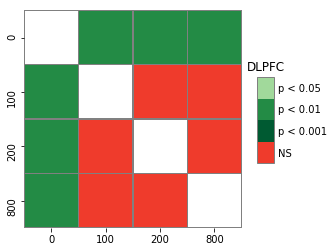

In [119]:
frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_LIP_d[idx, 5, : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries_d[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding LIP: Train: Target ' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    n=pd.DataFrame(cd_DLPFC_d[idx, 5, : ]).transpose()
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries_d[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Distractor decoding DLPFC: Train target' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


cond=[0, 100, 200, 800]
frames=[]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] == 5) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] ==5) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Distractor decoding: Tr target, Tt: taregt')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


####### Multiple comparisons
pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

In [146]:
i_t=10
f_t = 15

ns={}
for i in range(i_t, f_t):
    ns[str(i)]=pd.DataFrame(cd_LIP[idx, i, : ]).transpose() 

N=pd.Panel(ns)
n=N.mean(axis=0)
n

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,77.656767,84.390149,75.170121,80.674013,80.724175,72.683204,65.728296,57.125180,64.786543,56.759064,...,61.425089,55.247772,61.930488,60.763987,60.109561,57.305649,70.889859,63.387254,61.285090,57.929446
1,68.382790,68.313159,68.599626,67.873687,68.745088,70.954619,69.816667,70.148611,69.274383,69.542358,...,67.757310,70.247682,70.131371,67.314213,68.016961,68.359377,68.103489,68.892361,67.821183,66.773366
2,74.217544,74.249433,74.802231,73.663021,72.481819,70.248118,71.109728,70.802330,70.095721,71.819756,...,68.481702,73.207105,70.062302,72.982998,74.117957,74.989993,72.835193,76.261197,75.119660,75.535292
3,89.538331,85.242681,96.239215,89.437481,76.527058,45.962912,40.309885,44.091322,44.264751,50.333742,...,46.882205,47.589496,71.647599,54.087258,54.371415,47.347857,45.153854,49.174263,52.127709,53.452336
4,86.491403,79.269268,75.643420,75.232317,72.875601,72.371466,63.306682,57.419042,53.257648,53.049192,...,64.532969,74.150768,68.288231,65.561019,69.433131,64.318346,72.914275,68.880846,64.899576,65.579379
5,104.857962,92.126925,81.673116,82.366802,87.403846,61.025376,60.567775,52.148712,44.658756,45.294598,...,48.891250,48.778501,72.176790,69.814486,64.045715,59.400359,69.689881,67.525198,64.766861,58.577687
6,83.637528,80.848850,80.564980,82.571227,74.779472,66.598889,64.016909,54.544196,53.884053,57.530377,...,58.282444,58.339260,63.507632,63.284944,61.052992,61.735154,65.037733,62.287158,61.136457,62.451107
7,91.890241,82.278234,79.859757,78.149769,69.110970,66.245845,59.774150,54.522263,55.318570,51.241005,...,58.422747,71.481331,76.142900,68.626261,74.532229,71.294535,69.686578,76.938995,72.815541,71.047116
8,93.433821,94.004695,86.686964,83.306429,77.359027,66.017554,59.697597,58.388895,52.563401,48.691234,...,42.354858,43.542958,58.895231,51.556425,47.640954,50.360564,44.814734,48.849766,46.834767,46.019482
9,75.093138,83.891352,86.965862,92.229100,50.396690,53.758140,48.878491,51.259060,49.876392,57.846034,...,66.288985,64.437316,66.481439,74.335577,68.397674,68.617142,64.904447,63.040370,57.738754,59.173561


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


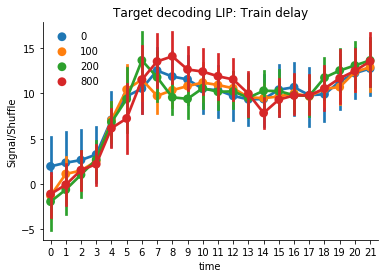

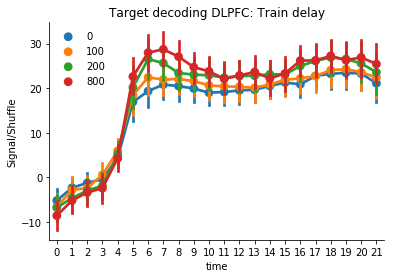

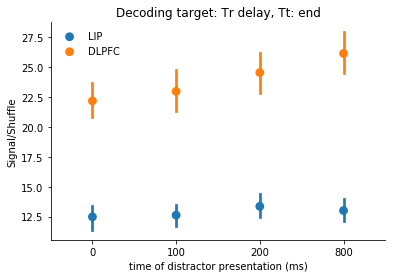

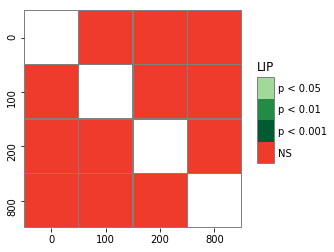

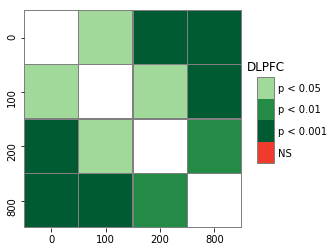

In [148]:
i_t=15
f_t = 20

frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    ns={}
    for i in range(i_t, f_t):
        ns[str(i)]=pd.DataFrame(cd_LIP[idx, i, : ]).transpose() 

    N=pd.Panel(ns)
    n=N.mean(axis=0)
    neurons_sh = []
    for neuron in range(0, 44):
        sh_cond_n = conditions_dictionaries[idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('Target decoding LIP: Train delay' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    ns={}
    for i in range(i_t, f_t):
        ns[str(i)]=pd.DataFrame(cd_DLPFC[idx, i, : ]).transpose() 

    N=pd.Panel(ns)
    n=N.mean(axis=0)
    neurons_sh = []
    for neuron in range(0, 63):
        sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
        np.array(sh_cond_n)
        subst = np.array(n.iloc[neuron]) - np.array(sh_cond_n)
        subst = -1*subst 
        neurons_sh.append(subst)

    n = pd.DataFrame(neurons_sh)
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    n['cond'] = cond
    n['area'] ='DLPFC'
    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('Target decoding DLPFC: Train delay' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
#plt.ylim(0.010, 0.030)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


cond=[0, 100, 200, 800]
frames=[]
for i in range(0,len(cond)):
    ##LIP
    int_values_lip = lip_dist.loc[(lip_dist['variable'] >19) & (lip_dist['cond'] == cond[i])]
    frames.append(int_values_lip)
    ##DLPFC
    int_values_dlpfc = dlpfc_dist.loc[(dlpfc_dist['variable'] >19) & (dlpfc_dist['cond'] == cond[i])]
    frames.append(int_values_dlpfc)


decoding = pd.concat(frames, ignore_index=True)


##Plot
sns.pointplot(x='cond', y='value', hue='area', ci=69, join=False, x_estimator=np.mean, data=decoding)
plt.legend(frameon=False)
plt.title('Decoding target: Tr delay, Tt: end')
plt.xlabel('time of distractor presentation (ms)')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


####### Multiple comparisons
pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='LIP'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('LIP')
plt.show()

pc = sp.posthoc_wilcoxon(decoding.loc[decoding['area']=='DLPFC'], val_col='value', group_col='cond') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


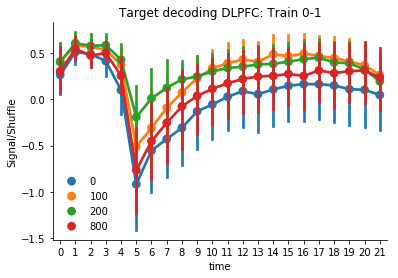

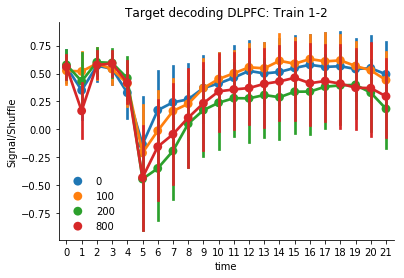

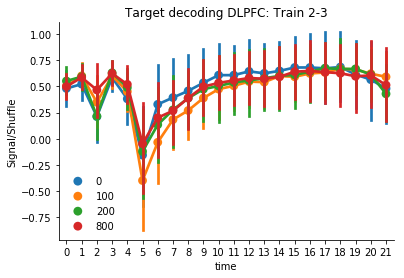

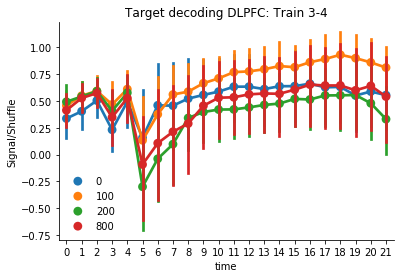

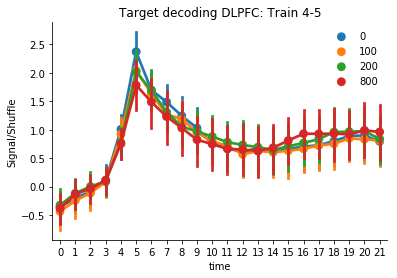

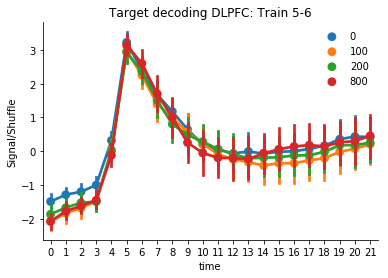

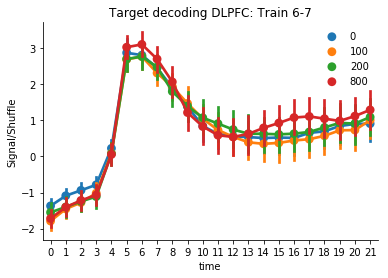

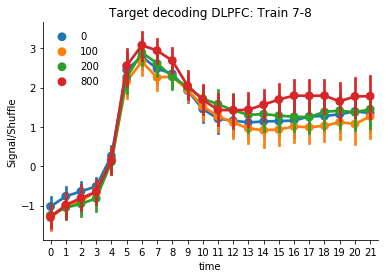

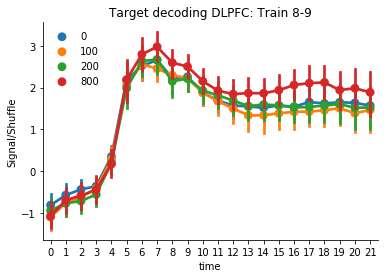

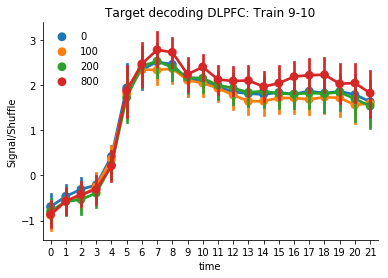

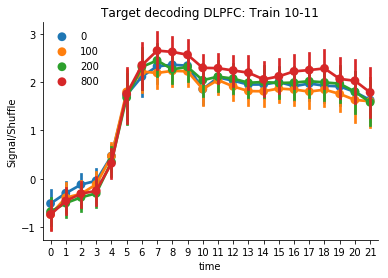

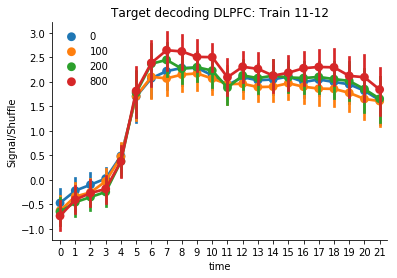

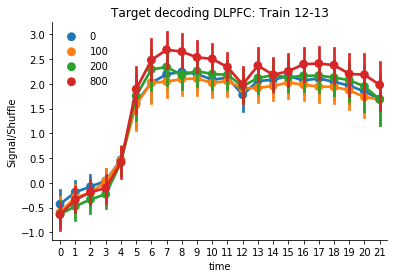

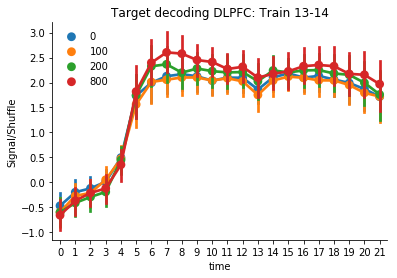

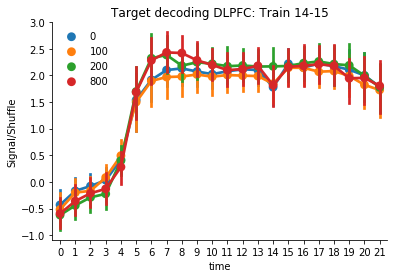

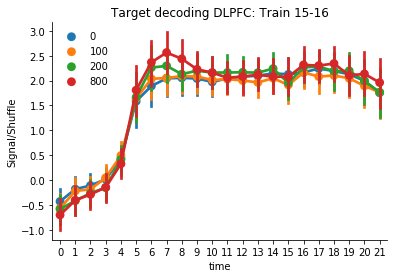

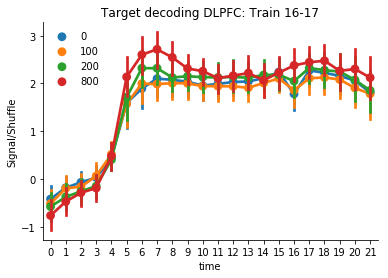

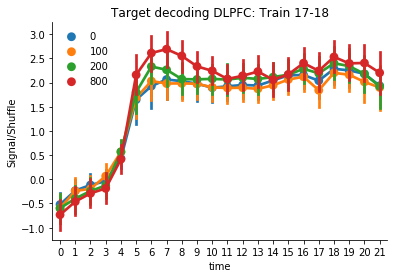

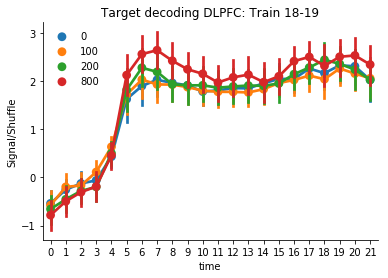

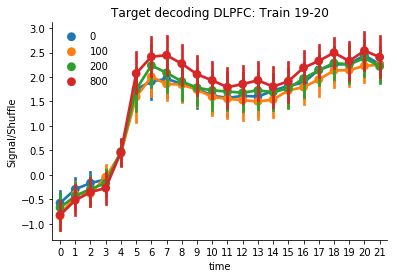

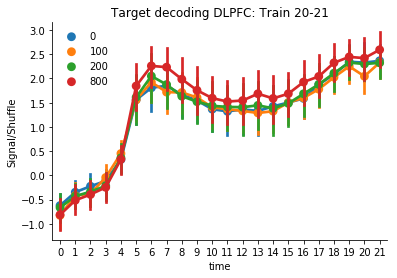

No handles with labels found to put in legend.


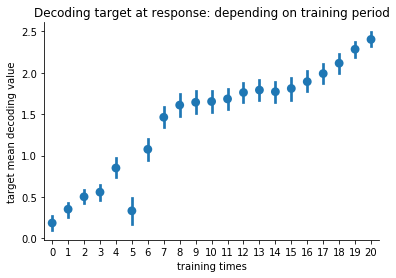

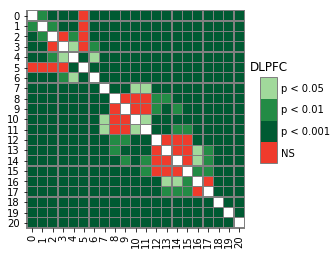

In [174]:

i_t = [0, 5, 7, 10, 13, 16 ]
f_t = [4, 7, 10, 13, 16, 19]
titles=['fixation', 'target', 'delay(0-300)', 'delay(300-600)', 'delay(600-900)', 'delay(900-1200)' ]

i_t = list(range(0, 21))
f_t = list(range(1, 22))
titles = [str(i_t[i]) for i in range(0, len(i_t))]
frames_fd=[]

#### All times (training in distractor presentation, test on the rest)

for win in range(0,len(i_t)):
    frames_dlpfc=[]

    for idx, cond in enumerate([0,100,200,800]):
        ns={}
        for i in range(i_t[win], f_t[win]):
            ns[str(i)]=pd.DataFrame(cd_DLPFC[idx, i, : ]).transpose() 

        N=pd.Panel(ns)
        n=N.mean(axis=0)
        neurons_sh = []
        for neuron in range(0, 63):
            sh_cond_n = conditions_dictionaries[4+idx][str(neuron)].mean(axis=0)
            sh_cond_n_std = conditions_dictionaries[4+idx][str(neuron)].std(axis=0)
            subst = (np.array(n.iloc[neuron]) - np.array(sh_cond_n))/ np.array(sh_cond_n_std)
            subst = -1*subst 
            neurons_sh.append(subst)

        n = pd.DataFrame(neurons_sh)
        n.columns=[x for x in range(0, 22)]
        n = pd.melt(n)
        n['cond'] = cond
        n['area'] ='DLPFC'
        frames_dlpfc.append(n)

    dlpfc_dist=pd.concat(frames_dlpfc)
    sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
    plt.legend(frameon=False)
    plt.title('Target decoding DLPFC: Train ' + str(i_t[win]) + '-' + str(f_t[win]) )
    plt.xlabel('time')
    plt.ylabel('Signal/Shuffle')
    #plt.ylim(-10, 35)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()
    
    #
    f_d = pd.DataFrame(dlpfc_dist.loc[dlpfc_dist['variable']==21, 'value'])
    f_d['tr_time'] =  i_t[win]
    f_d
    frames_fd.append(f_d)

    

frames_fd = pd.concat(frames_fd, ignore_index=True)

##Plot
sns.pointplot(x='tr_time', y='value', ci=69, join=False, x_estimator=np.mean, data=frames_fd)
plt.legend(frameon=False)
plt.title('Decoding target at response: depending on training period')
plt.xlabel('training times')
plt.ylabel('target mean decoding value')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

pc = sp.posthoc_wilcoxon(frames_fd, val_col='value', group_col='tr_time') 
#print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.title('DLPFC')
plt.show()

In [13]:
### Decode Distractor in target presentation trianing in distractor

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


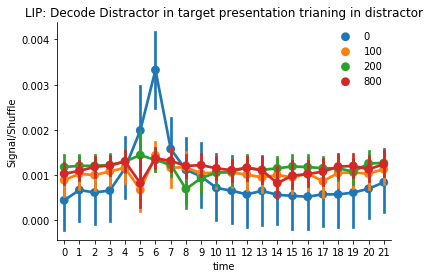

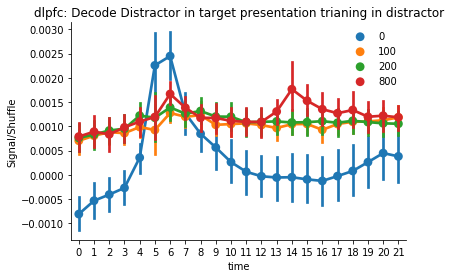

In [55]:

distractor_times=[6,7,8,14]


frames_lip=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_LIP_d[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_LIP_d[idx, 5, : ][i] - 1/shuffle_conditions_d[idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    ##    
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_lip.append(n)

lip_dist=pd.concat(frames_lip)
sns.pointplot(x='variable', y='value', hue='cond', data=lip_dist)
plt.legend(frameon=False)
plt.title('LIP: Decode Distractor in target presentation trianing in distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



#### All times (training in distractor presentation, test on the rest)
frames_dlpfc=[]

for idx, cond in enumerate([0,100,200,800]):
    #n=pd.DataFrame(cd_DLPFC_d[idx, 5, : ]).transpose()
    n = pd.DataFrame(np.array([1/cd_DLPFC_d[idx, 5, : ][i] - 1/shuffle_conditions_d[4+idx].mean(axis=0)[i] for i in range(0, 22)])).transpose()
    n.columns=[x for x in range(0, 22)]
    n = pd.melt(n)
    #n['value'] = 1/n['value']
    n['cond'] = cond
    n['area'] ='LIP'

    frames_dlpfc.append(n)

dlpfc_dist=pd.concat(frames_dlpfc)
sns.pointplot(x='variable', y='value', hue='cond', data=dlpfc_dist)
plt.legend(frameon=False)
plt.title('dlpfc: Decode Distractor in target presentation trianing in distractor' )
plt.xlabel('time')
plt.ylabel('Signal/Shuffle')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


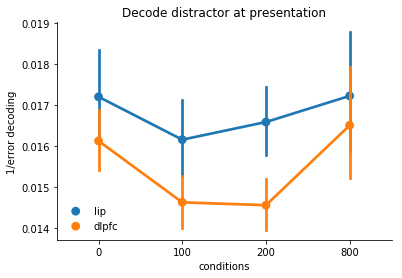

In [15]:
frames=[]

matrix_100_800 = pd.DataFrame({'0': 1/cd_LIP_d[0,6,6]})
matrix_100_800 ['100'] =  1/cd_LIP_d[1,7,7]
matrix_100_800 ['200'] =  1/cd_LIP_d[2,8,8]
matrix_100_800 ['800'] =  1/cd_LIP_d[3,14,14]
matrix_100_800['neuro']=range(0,len(matrix_100_800))
LIP_L =matrix_100_800.melt('neuro')
LIP_L.columns=['neuro', 'cond', 'value']
LIP_L['area']='lip'
frames.append(LIP_L)


matrix_100_800 = pd.DataFrame({'0': 1/cd_DLPFC_d[0,6,6]})
matrix_100_800 ['100'] =  1/cd_DLPFC_d[1,7,7]
matrix_100_800 ['200'] =  1/cd_DLPFC_d[2,8,8]
matrix_100_800 ['800'] =  1/cd_DLPFC_d[3,14,14]
matrix_100_800['neuro']=range(0,len(matrix_100_800))
dlpfc_L =matrix_100_800.melt('neuro')
dlpfc_L.columns=['neuro', 'cond', 'value']
dlpfc_L['area']='dlpfc'
frames.append(dlpfc_L)

fr = pd.concat(frames)
fr

sns.pointplot(x='cond', y='value', hue='area', ci=95, x_estimator=np.mean, data=fr)
plt.legend(frameon=False)
plt.title('Decode distractor at presentation')
plt.xlabel('conditions')
plt.ylabel('1/error decoding')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

#matrix_100_800 = matrix_100_800.melt('neuro')
#matrix_100_800.columns=['neuro', 'cond', 'value']

#sns.boxplot('neuro', 'value', hue='cond', data=matrix_100_800)
#sns.stripplot(y='value', x='neuro', data=blue)

# cat_100 = matrix_100_800['100']>matrix_100_800['100'].median()
# cat_800 = matrix_100_800['800']<matrix_100_800['800'].median()

# cat_m = pd.DataFrame({'100': cat_100, '800': cat_800 })
# cat_m['neuro']=range(0,len(cat_m))
# cat_m



In [33]:
fr

,neuro,cond,value,area
0,0,0,0.016210,lip
1,1,0,0.012422,lip
2,2,0,0.012482,lip
3,3,0,0.021017,lip
4,4,0,0.016334,lip
5,5,0,0.014879,lip
6,6,0,0.013411,lip
7,7,0,0.016827,lip
8,8,0,0.013936,lip
9,9,0,0.024675,lip


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


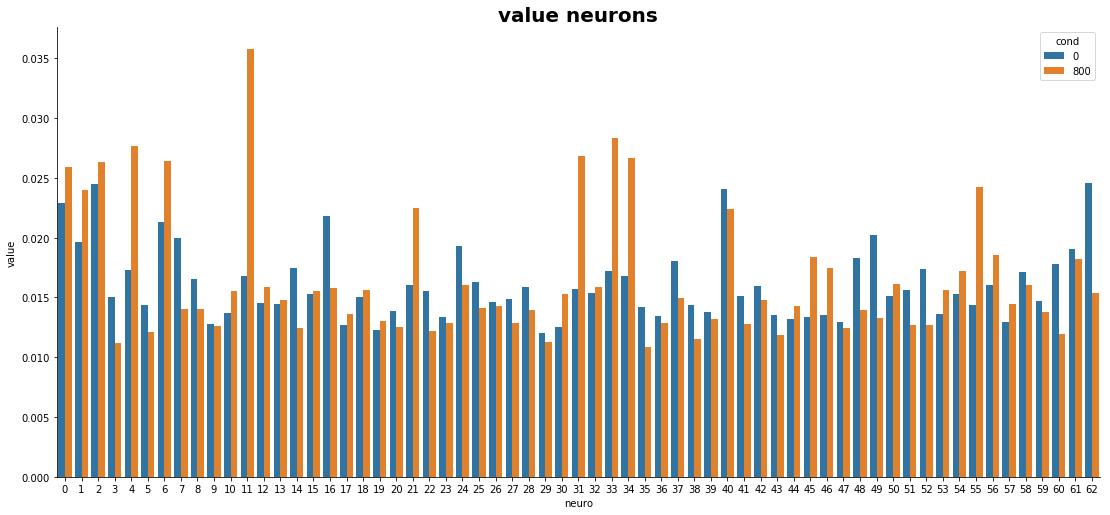

In [27]:
L =matrix_100_800.melt('neuro')
L.columns=['neuro', 'cond', 'value']
#matrix_100_800
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
g = sns.factorplot('neuro', 'value', 'cond', L, kind='bar', ax=ax)
ax.set_title('value neurons', fontsize=20, weight='demibold')
sns.despine(ax =ax)
plt.close()


AttributeError: Unknown property size

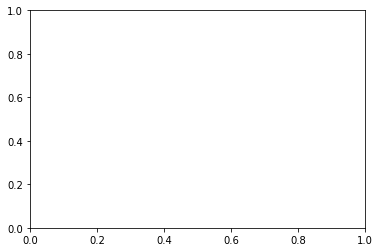

In [26]:
L['log_value'] = -np.log(L['value'])
sns.barplot(x='neuro', y='log_value', hue='cond', data=L, size=20)
plt.ylim(3,5)